# ATCM Network Structure Investigation
We're going to work out what the structure of the ATCM network is. First, let's read the data.

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Read the ATCM dataset and initialise it into a Pandas Dataframe
def read_ATCM_dataset():
    # Define the path to the Excel file
    file_path = 'ATCMDataset.xlsx'

    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path,sheet_name='ATCMDataset')

    # Display the DataFrame
    return df

# Df is the returned pandas dataframe.
df = read_ATCM_dataset()
print(df)


                            ID  DocumentID Type  Year  \
0          ATCM45_ip001_e.docx           0   ip  2023   
1          ATCM45_ip002_e.docx           1   ip  2023   
2     ATCM45_ip003_rev1_e.docx           2   ip  2023   
3          ATCM45_ip004_e.docx           3   ip  2023   
4          ATCM45_ip005_e.docx           4   ip  2023   
...                        ...         ...  ...   ...   
6308        ATCM1_wp025_e.docx        5237   wp  1961   
6309        ATCM1_wp029_e.docx        5238   wp  1961   
6310        ATCM1_wp031_e.docx        5239   wp  1961   
6311        ATCM1_wp033_e.docx        5240   wp  1961   
6312        ATCM1_wp034_e.docx        5241   wp  1961   

                                                  Title    Submitted By  \
0     Report by the CEP Observer to the XXXVII SCAR ...          France   
1     Report by the CCAMLR Observer to the Forty Fif...          CCAMLR   
2     Report by the United Kingdom as Depositary Gov...  United Kingdom   
3     Report of

# Initialise the Network- Step 1
Initialise the node names of the various countries. <br>


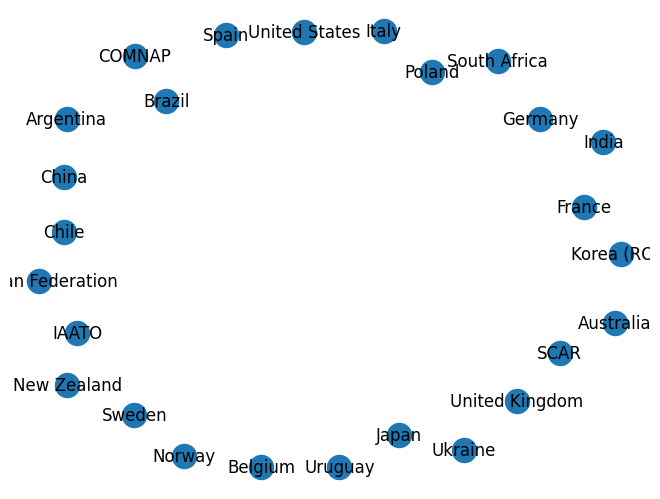

In [2]:
consultative_parties = [ 'SCAR','IAATO','COMNAP', 'United States', 'Ukraine', 'Belgium', 'New Zealand', 'Uruguay', 'Spain', 'Russian Federation', 'Italy', 'India', 'United Kingdom', 'Brazil', 'Poland', 'Japan', 'Argentina', 'China', 'Norway', 'South Africa', 'Chile', 'Sweden', 'Australia', 'Germany', 'France', 'Korea (ROK)']
"""
def get_nodes(df):
    nodes=set()
    for row in df['Submitted By']:
        countries = [item.strip() for item in row.split(',')]
        countries=list(countries)
        countries=set(countries)
        nodes.update(countries)
    nodes=list(nodes)
        
    return nodes

nodes=get_nodes(df)
print(nodes)
print(len(nodes))
"""

# Initialize the network in networkx
ATCM_network = nx.Graph()

# Add nodes to the graph
#ATCM_network.add_nodes_from(nodes)
ATCM_network.add_nodes_from(consultative_parties)

# Draw the network
nx.draw(ATCM_network, with_labels=True)
plt.show()
    

# Initialise the Network- Step 2
Create the graph with an edge between nodes $a$ and $b$ if they share at least one working paper. <br>
The weight of this edge is given by the number of working papers that $a$ and $b$ have collaborated on in the dataset. <br>

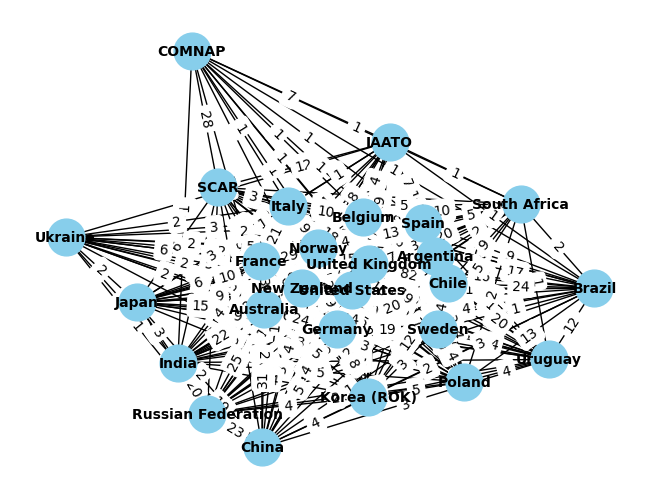

In [3]:
def add_edges(df,ATCM_network):
    nodes= list(ATCM_network.nodes)
    for n1 in nodes:
        for n2 in nodes:
            if n1 != n2:
                count=0
                for row in df['Submitted By']:
                    items = [item.strip() for item in row.split(',')]
                    if n1 in items and n2 in items:
                        count+=1
                        continue
                # Count is the total weight of the edge. 
                if count >=1:
                    ATCM_network.add_edge(n1,n2,weight=count)
    return

add_edges(df,ATCM_network)

# Visualize the network
pos = nx.spring_layout(ATCM_network)  # Positions for all nodes with specified spacing
nx.draw(ATCM_network, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(ATCM_network, 'weight')
nx.draw_networkx_edge_labels(ATCM_network, pos, edge_labels=edge_labels)

plt.show()

# Check Degree Distribution of the network
Graph the degree distribution in Matplotlib and see what it looks like. 

SCAR 23
IAATO 23
COMNAP 14
United States 25
Ukraine 20
Belgium 25
New Zealand 24
Uruguay 22
Spain 24
Russian Federation 23
Italy 24
India 25
United Kingdom 25
Brazil 22
Poland 24
Japan 23
Argentina 24
China 19
Norway 23
South Africa 23
Chile 25
Sweden 24
Australia 25
Germany 24
France 24
Korea (ROK) 25
DEGREE SEQUENCE:  [23, 23, 14, 25, 20, 25, 24, 22, 24, 23, 24, 25, 25, 22, 24, 23, 24, 19, 23, 23, 25, 24, 25, 24, 24, 25]
Degree Distribution Power Law Fit Coefficients (a, b): [ 1.94345331e-13 -8.69233078e+00]


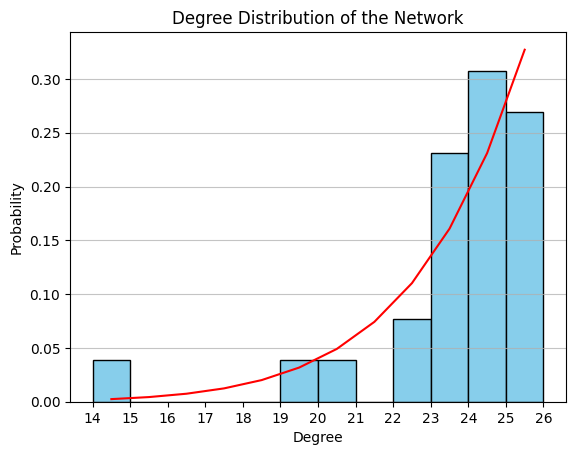

WEIGHT SEQUENCE:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 24, 25, 25, 25, 27, 28, 29, 29, 31, 31, 33, 36, 36, 38, 38, 39, 39, 40, 41, 43, 45, 47, 48, 48, 49, 50, 60, 62, 64, 72, 75, 79, 82,

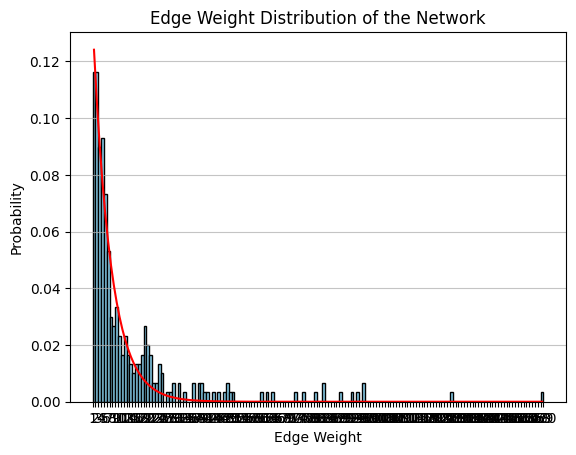

In [4]:
# Plot a histogram of the degree.
def plot_degree_distribution(ATCM_network):

    # Define power-law function
    def power_law(x, a, b):
        return a * x**(-b)
    # Plot the degree distribution as a probability distribution
    degrees = [ATCM_network.degree(node) for node in ATCM_network.nodes()]
    for i in ATCM_network.nodes():
        print(i,ATCM_network.degree(i))
    print("DEGREE SEQUENCE: ", degrees)
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.title('Degree Distribution of the Network')
    plt.xticks(range(min(degrees), max(degrees) + 2))
    plt.grid(axis='y', alpha=0.75)

    # Regression model on the power law.
    bin_centers = np.array(range(min(degrees), max(degrees) + 1)) + 0.5
    hist, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2), density=True)
    popt, _ = curve_fit(power_law, bin_centers, hist)


    print("Degree Distribution Power Law Fit Coefficients (a, b):", popt)
    plt.plot(bin_centers, power_law(bin_centers, *popt), 'r-', label='Power Law Fit')

    plt.show()

plot_degree_distribution(ATCM_network)

# Plot a similar histogram for the edge weights:
def plot_weight_distribution(ATCM_network):
    # Calculate edge weight distribution

    def exponential(x, a, b):
        return a * np.exp(-b * x)

    edge_weights = [ATCM_network[edge[0]][edge[1]]['weight'] for edge in ATCM_network.edges()]
    edge_weights.sort()
    print("WEIGHT SEQUENCE: ", edge_weights)
    # Plot the edge weight distribution
    plt.hist(edge_weights, bins=range(min(edge_weights), max(edge_weights) + 2), density=True, color='skyblue', edgecolor='black')
    plt.xlabel('Edge Weight')
    plt.ylabel('Probability')
    plt.title('Edge Weight Distribution of the Network')
    plt.xticks(range(min(edge_weights), max(edge_weights) + 2))
    plt.grid(axis='y', alpha=0.75)

    bin_centers = np.array(range(min(edge_weights), max(edge_weights) + 1)) + 0.5
    hist, bin_edges = np.histogram(edge_weights, bins=range(min(edge_weights), max(edge_weights) + 2), density=True)
    popt, _ = curve_fit(exponential, bin_centers, hist)
    print("Weight Distribution Exponential Fit Coefficients (a, b):", popt)
    plt.plot(bin_centers, exponential(bin_centers, *popt), 'r-', label='Exponential Fit')

    

    plt.show()

plot_weight_distribution(ATCM_network)

0.9409495548961424
0.9443148372095741


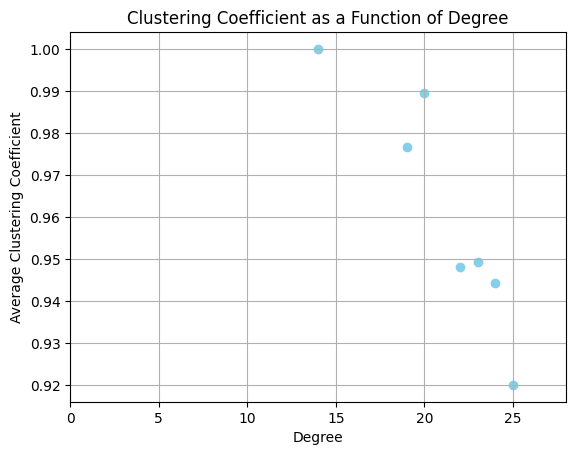

1.073846153846154
1.0013736914404812
-2.220446049250313e-16


In [5]:
# Clustering coefficient.
# Global clustering
print(nx.transitivity(ATCM_network))
# Average node clustering
print(nx.average_clustering(ATCM_network))

# Graph node clustering as a function of degree
def plot_clustering_vs_degree(G):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)

    degree_clustering = {}
    for node, degree in degrees.items():
        if degree not in degree_clustering:
            degree_clustering[degree] = []
        degree_clustering[degree].append(clustering_coeffs[node])

    avg_clustering = {degree: np.mean(clustering_coeffs) for degree, clustering_coeffs in degree_clustering.items()}
    
    degrees = list(avg_clustering.keys())
    clustering_values = list(avg_clustering.values())

    plt.scatter(degrees, clustering_values, color='skyblue')
    plt.xlabel('Degree')
    plt.ylabel('Average Clustering Coefficient')
    plt.xlim((0,28))
    plt.title('Clustering Coefficient as a Function of Degree')
    plt.grid(True)
    plt.show()

plot_clustering_vs_degree(ATCM_network)

# If we remove the disconnected bits and take the largest connected component, then we can run the small world measures.
largest_cc = max(nx.connected_components(ATCM_network), key=len)
sub = ATCM_network.subgraph(largest_cc).copy()

print(nx.average_shortest_path_length(sub))

print(nx.sigma(sub))
print(nx.omega(sub))